In [9]:
import pandas as pd
import scipy.stats

eng = pd.read_csv('../Downloads/eng_test.csv', sep=';')
eng.head()

,Id,Exam,Score,Advanced
0,ID1,TOEFL,77.0,NO
1,ID10,TOEFL,105.0,NO
2,ID100,TOEFL,107.0,YES
3,ID101,TOEFL,72.0,NO
4,ID102,TOEFL,120.0,YES
...,...,...,...,...
249,ID77,TOEFL,118.0,YES
250,ID78,TOEFL,114.0,YES
251,ID79,TOEFL,83.0,YES
252,ID8,TOEFL,87.0,NO


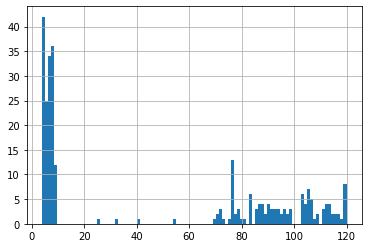

In [4]:
eng['Score'].hist(bins=100);

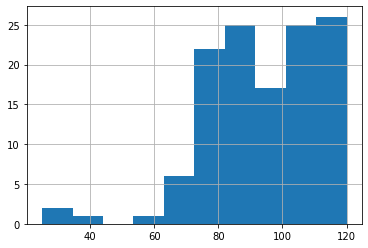

In [10]:
toefl = eng[eng['Exam'] == 'TOEFL']
toefl['Score'].hist();

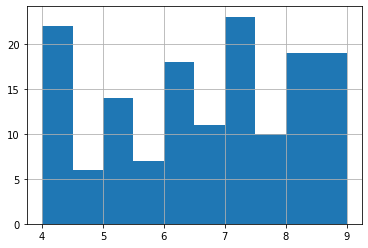

In [12]:
ielts = eng[eng['Exam'] == 'IELTS']
ielts['Score'].hist();

In [13]:
# Сначала делаем руками
X = toefl['Score'][0]
mean = toefl['Score'].mean()
std = toefl['Score'].std(ddof=0)
print(X, mean, std)

77.0 93.776 17.83204486311091


In [15]:
z_score = (X - mean)/std
z_score

-0.9407782522297513

In [19]:
z_new = 1.4706109
X_new = mean + z_new * std
print(round(X_new))

120


In [25]:
toefl['Z_score'] = scipy.stats.zscore(toefl['Score'])
toefl

C:\Users\Professional\AppData\Local\Temp\ipykernel_360\203102930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toefl['Z_score'] = scipy.stats.zscore(toefl['Score'])


,Id,Exam,Score,Advanced,Z_score
0,ID1,TOEFL,77.0,NO,-0.940778
1,ID10,TOEFL,105.0,NO,0.629429
2,ID100,TOEFL,107.0,YES,0.741586
3,ID101,TOEFL,72.0,NO,-1.221172
4,ID102,TOEFL,120.0,YES,1.470611
...,...,...,...,...,...
269,ID95,TOEFL,88.0,YES,-0.323911
270,ID96,TOEFL,90.0,YES,-0.211754
271,ID97,TOEFL,90.0,YES,-0.211754
272,ID98,TOEFL,54.0,NO,-2.230591


In [24]:
ielts['Z_score'] = scipy.stats.zscore(ielts['Score'])
ielts

C:\Users\Professional\AppData\Local\Temp\ipykernel_360\3495837452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ielts['Z_score'] = scipy.stats.zscore(ielts['Score'])


,Id,Exam,Score,Advanced,Z_score
30,ID126,IELTS,9.0,YES,1.639443
31,ID127,IELTS,5.0,NO,-0.915088
32,ID128,IELTS,7.5,YES,0.681494
33,ID129,IELTS,5.0,NO,-0.915088
35,ID130,IELTS,4.0,NO,-1.553720
...,...,...,...,...,...
190,ID270,IELTS,8.0,YES,1.000810
191,ID271,IELTS,6.5,NO,0.042861
192,ID272,IELTS,4.0,NO,-1.553720
193,ID273,IELTS,7.0,YES,0.362178


In [26]:
eng_new = pd.concat([toefl, ielts])
eng_new

,Id,Exam,Score,Advanced,Z_score
0,ID1,TOEFL,77.0,NO,-0.940778
1,ID10,TOEFL,105.0,NO,0.629429
2,ID100,TOEFL,107.0,YES,0.741586
3,ID101,TOEFL,72.0,NO,-1.221172
4,ID102,TOEFL,120.0,YES,1.470611
...,...,...,...,...,...
190,ID270,IELTS,8.0,YES,1.000810
191,ID271,IELTS,6.5,NO,0.042861
192,ID272,IELTS,4.0,NO,-1.553720
193,ID273,IELTS,7.0,YES,0.362178


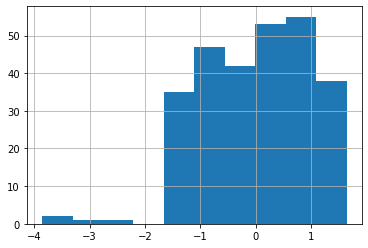

In [28]:
eng_new['Z_score'].hist();

In [29]:
eng_new[eng_new['Z_score'] < -3]

,Id,Exam,Score,Advanced,Z_score
25,ID121,TOEFL,32.0,NO,-3.464325
27,ID123,TOEFL,25.0,YES,-3.856877


In [30]:
eng_new.groupby('Advanced')['Z_score'].mean()

Advanced
NO    -0.397672
YES    0.440499
Name: Z_score, dtype: float64

In [32]:
import numpy as np

data = pd.read_pickle('../Downloads/BikesDataVars.pkl')
data.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0


In [33]:
data['Rental Count'].describe()

count    8760.000000
mean      696.582078
std       749.812613
min         0.000000
25%       157.000000
50%       425.500000
75%      1009.000000
max      6012.000000
Name: Rental Count, dtype: float64

In [34]:
q3 = np.percentile(data['Rental Count'], 75)
q1 = np.percentile(data['Rental Count'], 25)
print(q1, q3)

157.0 1009.0


In [35]:
iqr = q3 - q1
iqr

852.0

In [36]:
iqr_threshold_bottom = q1 - 1.5 * iqr
iqr_threshold_top = q3 + 1.5 * iqr
print(iqr_threshold_bottom, iqr_threshold_top)

-1121.0 2287.0


In [38]:
data[data['Rental Count'] > iqr_threshold_top].shape

(413, 14)

In [39]:
data[data['Rental Count'] > iqr_threshold_top]['Hour'].value_counts()

18    95
19    64
17    51
20    48
21    39
8     38
16    23
22    21
15    10
14     8
13     7
23     4
7      4
9      1
Name: Hour, dtype: int64

In [41]:
data[data['Rental Count'] > iqr_threshold_top]['Seasons'].value_counts()

Summer    196
Autumn    116
Spring    101
Name: Seasons, dtype: int64

In [42]:
mean = data['Rental Count'].mean()
std = data['Rental Count'].std()
std_threshold_bottom = mean - 2.5 * std
std_threshold_top = mean + 2.5 * std
print(std_threshold_bottom, std_threshold_top)

-1177.9494551643193 2571.1136104154607


In [43]:
data[data['Rental Count'] > std_threshold_top].shape

(278, 14)

In [44]:
iqr_no_outliers = data[data['Rental Count'] <= iqr_threshold_top]
std_no_outliers = data[data['Rental Count'] <= std_threshold_top]

In [45]:
print(data['Rental Count'].mean())
print(iqr_no_outliers['Rental Count'].mean())
print(std_no_outliers['Rental Count'].mean())

696.5820776255708
584.146280100635
613.2393303466164


In [46]:
print(data['Rental Count'].median())
print(iqr_no_outliers['Rental Count'].median())
print(std_no_outliers['Rental Count'].median())

425.5
392.0
402.0


In [49]:
def get_temp_cat(temp):
    if temp < 0:
        return 'Freezing'
    elif temp < 15:
        return 'Chily'
    elif temp < 26:
        return 'Nice'
    elif temp >= 26:
        return 'Hot'
    else:
        return temp

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  8760 non-null   datetime64[ns]
 1   Hour                  8760 non-null   int64         
 2   Temperature           8581 non-null   float64       
 3   Humidity              8760 non-null   int64         
 4   Wind speed            8760 non-null   float64       
 5   Rainfall              8760 non-null   float64       
 6   Snowfall              8760 non-null   float64       
 7   Seasons               8760 non-null   object        
 8   Holiday               8760 non-null   int64         
 9   Functioning Day       8760 non-null   bool          
 10  Rental Count          8760 non-null   int64         
 11  Normal Humidity       8760 non-null   int64         
 12  Temperature Category  8581 non-null   category      
 13  Good Weather      

In [58]:
data.isna().sum()

Date                      0
Hour                      0
Temperature             179
Humidity                  0
Wind speed                0
Rainfall                  0
Snowfall                  0
Seasons                   0
Holiday                   0
Functioning Day           0
Rental Count              0
Normal Humidity           0
Temperature Category    179
Good Weather              0
dtype: int64

In [54]:
data[data['Temperature'].isna()]['Temperature'][39]

nan

In [55]:
type(data[data['Temperature'].isna()]['Temperature'][39])

numpy.float64

In [56]:
#Можно выбросить пустые значения
data.dropna(subset=['Temperature']).shape

(8581, 14)

In [62]:
data['Temperature_Median'] = data['Temperature'].fillna(data['Temperature'].median())
data[data['Temperature'].isna()]

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather,Temperature_Median
39,2017-12-02,15,NaN,41,2.3,0.0,0.0,Winter,0,True,688,1,NaN,0,13.7
50,2017-12-03,2,NaN,79,1.4,0.0,0.0,Winter,0,True,262,0,NaN,0,13.7
64,2017-12-03,16,NaN,77,1.6,0.0,0.0,Winter,0,True,577,0,NaN,0,13.7
105,2017-12-05,9,NaN,31,1.3,0.0,0.0,Winter,0,True,313,0,NaN,0,13.7
151,2017-12-07,7,NaN,93,0.5,0.0,0.9,Winter,0,True,269,0,NaN,0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8669,2018-11-27,5,NaN,84,0.6,0.0,0.0,Autumn,0,True,176,0,NaN,0,13.7
8679,2018-11-27,15,NaN,70,2.1,0.0,0.0,Autumn,0,True,670,0,NaN,0,13.7
8710,2018-11-28,22,NaN,34,1.3,0.0,0.0,Autumn,0,True,1034,0,NaN,0,13.7
8717,2018-11-29,5,NaN,34,0.9,0.0,0.0,Autumn,0,True,30,0,NaN,0,13.7


In [63]:
data.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather,Temperature_Median
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0,-5.2
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0,-5.5
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0,-6.0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0,-6.2
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0,-6.0


In [64]:
data.iloc[38:42]

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather,Temperature_Median
38,2017-12-02,14,7.3,35,1.3,0.0,0.0,Winter,0,True,1054,0,Chilly,0,7.3
39,2017-12-02,15,NaN,41,2.3,0.0,0.0,Winter,0,True,688,1,NaN,0,13.7
40,2017-12-02,16,6.4,48,2.6,0.0,0.0,Winter,0,True,592,1,Chilly,0,6.4
41,2017-12-02,17,6.0,51,2.5,0.0,0.0,Winter,0,True,141,1,Chilly,0,6.0


In [76]:
temps_random = np.random.choice(data['Temperature'].dropna(), 8760)
temps_random

array([17.4, 11.6,  2.1, ..., 18.7, -4.4, 24.2])

In [79]:
data['Temperature_Random'] = data['Temperature'].fillna(pd.Series(temps_random))

In [80]:
data[data['Temperature'].isna()].head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather,Temperature_Median,Temperature_Random
39,2017-12-02,15,NaN,41,2.3,0.0,0.0,Winter,0,True,688,1,NaN,0,13.7,20.3
50,2017-12-03,2,NaN,79,1.4,0.0,0.0,Winter,0,True,262,0,NaN,0,13.7,6.3
64,2017-12-03,16,NaN,77,1.6,0.0,0.0,Winter,0,True,577,0,NaN,0,13.7,18.7
105,2017-12-05,9,NaN,31,1.3,0.0,0.0,Winter,0,True,313,0,NaN,0,13.7,28.4
151,2017-12-07,7,NaN,93,0.5,0.0,0.9,Winter,0,True,269,0,NaN,0,13.7,13.5


In [81]:
data.iloc[38:42]

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather,Temperature_Median,Temperature_Random
38,2017-12-02,14,7.3,35,1.3,0.0,0.0,Winter,0,True,1054,0,Chilly,0,7.3,7.3
39,2017-12-02,15,NaN,41,2.3,0.0,0.0,Winter,0,True,688,1,NaN,0,13.7,20.3
40,2017-12-02,16,6.4,48,2.6,0.0,0.0,Winter,0,True,592,1,Chilly,0,6.4,6.4
41,2017-12-02,17,6.0,51,2.5,0.0,0.0,Winter,0,True,141,1,Chilly,0,6.0,6.0


In [88]:
temp_median = data.groupby([data['Date'].dt.week ,'Hour'])['Temperature'].transform('median')

C:\Users\Professional\AppData\Local\Temp\ipykernel_360\1273078139.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  temp_median = data.groupby([data['Date'].dt.week ,'Hour'])['Temperature'].transform('median')


In [90]:
data['Temperature Median Group'] = data['Temperature'].fillna(temp_median)

In [91]:
data.iloc[38:42]

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather,Temperature_Median,Temperature_Random,Temperature Median Group
38,2017-12-02,14,7.3,35,1.3,0.0,0.0,Winter,0,True,1054,0,Chilly,0,7.3,7.3,7.3
39,2017-12-02,15,NaN,41,2.3,0.0,0.0,Winter,0,True,688,1,NaN,0,13.7,20.3,7.5
40,2017-12-02,16,6.4,48,2.6,0.0,0.0,Winter,0,True,592,1,Chilly,0,6.4,6.4,6.4
41,2017-12-02,17,6.0,51,2.5,0.0,0.0,Winter,0,True,141,1,Chilly,0,6.0,6.0,6.0


In [92]:
data['Temperature'] = data['Temperature'].fillna(temp_median)

In [93]:
del data['Temperature_Median']
del data['Temperature_Random']
del data['Temperature Median Group']

In [96]:
data['Temperature Category'] = pd.Categorical(data['Temperature'].apply(get_temp_cat))

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  8760 non-null   datetime64[ns]
 1   Hour                  8760 non-null   int64         
 2   Temperature           8760 non-null   float64       
 3   Humidity              8760 non-null   int64         
 4   Wind speed            8760 non-null   float64       
 5   Rainfall              8760 non-null   float64       
 6   Snowfall              8760 non-null   float64       
 7   Seasons               8760 non-null   object        
 8   Holiday               8760 non-null   int64         
 9   Functioning Day       8760 non-null   bool          
 10  Rental Count          8760 non-null   int64         
 11  Normal Humidity       8760 non-null   int64         
 12  Temperature Category  8760 non-null   category      
 13  Good Weather      

In [98]:
data.to_pickle('../Downloads/BikesDataVars_new.pkl')

In [158]:
# ТЕСТ
marvel = pd.read_excel('../Downloads/MarvelComicCaracters.xlsx')
marvel.head()

,name,align,eye,hair,sex,appearances,first_appearance
0,Spider-Man (Peter Parker),Добрый персонаж,Карие глаза,Каштановые волосы,Мужской персонаж,4043.0,1962.0
1,Captain America (Steven Rogers),Добрый персонаж,Голубые глаза,Белые волосы,Мужской персонаж,3360.0,1941.0
2,"Wolverine (James \""Logan\"" Howlett)",Нейтральный персонаж,Голубые глаза,Черные волосы,Мужской персонаж,3061.0,1974.0
3,"Iron Man (Anthony \""Tony\"" Stark)",Добрый персонаж,Голубые глаза,Черные волосы,Мужской персонаж,2961.0,1963.0
4,Thor (Thor Odinson),Добрый персонаж,Голубые глаза,Русые волосы,Мужской персонаж,2258.0,1950.0


In [159]:
marvel[marvel['appearances'].isna()].shape

(1096, 7)

In [168]:
marvel = marvel.dropna(subset=['appearances'])
marvel.isna().sum()
marvel['appearances'].describe()

count    15280.000000
mean        17.033377
std         96.372959
min          1.000000
25%          1.000000
50%          3.000000
75%          8.000000
max       4043.000000
Name: appearances, dtype: float64

In [176]:
q1 = np.percentile(marvel['appearances'], 25)
q3 = np.percentile(marvel['appearances'], 75)
iqr = q3 - q1
bottom = q1 - 1.5 * iqr
top = q3 + 1.5 * iqr
print(bottom, top)
marvel.describe()

-9.5 18.5


,appearances,first_appearance
count,15280.000000,14665.000000
mean,17.033377,1984.692260
std,96.372959,19.806938
min,1.000000,1939.000000
25%,1.000000,1974.000000
50%,3.000000,1989.000000
75%,8.000000,2000.000000
max,4043.000000,2013.000000


In [177]:
marvel[marvel['appearances'] > top].shape

(1938, 7)

In [178]:
marvel[(marvel['appearances'] > top) 
                   & (marvel_without_tem['align'] == 'Добрый персонаж')].shape

(944, 7)

In [179]:
marvel[(marvel['appearances'] > top) 
                   & (marvel_without_tem['align'] == 'Злой персонаж')].shape

(551, 7)

In [187]:
marvel['log_app'] = np.log(marvel['appearances'])
mean = marvel['log_app'].mean()
std = marvel['log_app'].std()
std_bottom = mean - 3 * std
std_top = mean + 3 * std
print(std_bottom, std_top)
marvel[marvel['log_app'] > std_top].shape

-2.691982415279326 5.374696975177229


(195, 8)

In [189]:
mean = marvel['appearances'].mean()
std = marvel['appearances'].std()
std_bottom = mean - 3 * std
std_top = mean + 3 * std
print(std_bottom, std_top)
marvel[marvel['appearances'] > std_top].shape

-272.0855011626842 306.1522550893858


(128, 8)

In [193]:
marvel['Z_score'] = scipy.stats.zscore(marvel['appearances'])
mean = marvel['Z_score'].mean()
std = marvel['Z_score'].std()
Z_std_bottom = mean - 3 * std
Z_std_top = mean + 3 * std
print(Z_std_bottom, Z_std_top)
marvel[(marvel['Z_score'] > Z_std_top) & (marvel['sex'] == 'Женский персонаж')].shape

-3.0000981723575664 3.000098172357563


(42, 9)

In [197]:
print(top, std_top)
marvel[marvel['appearances'] <= top].shape # 13342
marvel[marvel['appearances'] <= std_top].shape # 15152

18.5 306.1522550893858


(15152, 9)

In [205]:
marvel.groupby(['align', 'sex'])['hair'].value_counts()

align                 sex                      hair                    
Добрый персонаж       Безполый персонаж        Без волос                     3
                                               Разноцветные волосы           1
                      Гендерфлюидный персонаж  Каштановые волосы             1
                      Женский персонаж         Черные волосы               418
                                               Русые волосы                309
                                                                          ... 
Нейтральный персонаж  Мужской персонаж         Розовые волосы                2
                                               Серебристые волосы            2
                                               Золотые волосы                1
                                               Светло-каштановые волосы      1
                                               Фиолетовые волосы             1
Name: hair, Length: 97, dtype: int64

In [208]:
temp = marvel[marvel['appearances'] <= std_top]
temp.groupby(['align', 'sex'])['hair'].value_counts()

align                 sex                      hair                    
Добрый персонаж       Безполый персонаж        Без волос                     3
                                               Разноцветные волосы           1
                      Гендерфлюидный персонаж  Каштановые волосы             1
                      Женский персонаж         Черные волосы               410
                                               Русые волосы                302
                                                                          ... 
Нейтральный персонаж  Мужской персонаж         Светло-розовые волосы         2
                                               Серебристые волосы            2
                                               Золотые волосы                1
                                               Светло-каштановые волосы      1
                                               Фиолетовые волосы             1
Name: hair, Length: 96, dtype: int64

In [209]:
marvel.groupby(['align'])['appearances'].median()

align
Добрый персонаж         5.0
Злой персонаж           3.0
Нейтральный персонаж    3.0
Name: appearances, dtype: float64

In [210]:
temp = marvel[marvel['appearances'] <= std_top]
temp.groupby(['align'])['appearances'].median()

align
Добрый персонаж         4.5
Злой персонаж           3.0
Нейтральный персонаж    3.0
Name: appearances, dtype: float64